<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>

We are now going to give the first steps into exploring the United Nations General Debate Corpus. <span style="color:red">This dataset will be used in Group Assignment I (due date, Monday 2 October, 23:59)</span>. It is expected that you will pose a questions about the dataset, explore it, and combine it with other datasets (e.g., the Happiness Report 2022 that we've been using, or the International Trade Dataset).

We will use the *the UN General Debate Corpus (UNGDC)*, which introduces the corpus of texts of UN General Debate statements from 1970 (Session 25) to 2022 (Session 77). More info [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y). Make sure to download the file <code>UNGDC_1946-2022.tar</code> and extract the folder <code>TXT/</code> to the same directory as the current Jupyter notebook.

Notice that the 78th session of the UN General Assembly - where the 2023 debates will happen - will occur in 19-23 September 2023, precisely during the time you'll be working in Assignment 1. More info [here](https://www.un.org/en/ga/).

You might find useful to have a dataset with the full name and 3-code description of countries. You can find that data [here](https://unstats.un.org/unsd/methodology/m49/overview/). Download the correspondig CSV file (named 'UNSD — Methodology.csv') and place it into the same folder as this notebook.

We will start by loading the speeches text to a table:

In [1]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)

    # directory = f"./TXT/Session {session} - {1945+session}"
    for filename in os.listdir(directory):
        # f = open(os.path.join(directory, filename))
        with open(os.path.join(directory, filename)) as f:
            if filename[0]==".": #ignore hidden files
                continue
            splt = filename.split("_")
            data.append([session, 1945+session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,HRV,"Mr President, Excellencies\nAll protocol obser..."
8477,75,2020,GAB,"Mr. President, Majesties,\nLadies and Gentleme..."
8478,75,2020,MCO,"Mr. President of the General Assembly,\nMr. Se..."
8479,75,2020,AND,"Mr. President,\nMr. Secretary General,\nYour E..."
8480,75,2020,BHR,"In the name of Allah, the most gracious, the m..."


Download the 'UNSD — Methodology.csv' ([link](https://unstats.un.org/unsd/methodology/m49/overview/)) file and and try to load it. Please check what is the separator used. Why is that separator used?

In [11]:
df_codes = pd.read_csv('UNSD — Methodology.csv', delimiter=';')

df_codes.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


**Q1: Can you create a merged DataFrame — merge between df_codes and df_speech according to ISO-alpha3 and composed of columns \["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Least Developed Countries (LDC)", "Session", "Year", "Speech"\]? It would be convinient to have index as (Year, 'ISO-alpha3 Code')**

In [35]:
df = pd.merge(left=df_speech, right=df_codes, how='left', on='ISO-alpha3 Code')
df_merged_clean = df_merged[["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Least Developed Countries (LDC)", "Session", "Year", "Speech"]]
df = df_merged_clean.set_index(['Year', 'ISO-alpha3 Code'])


df.head()

Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 AUT                     Austria      Europe   
     MEX                      Mexico    Americas   
     COG                       Congo      Africa   
     DZA                     Algeria      Africa   
     LKA                   Sri Lanka        Asia   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 AUT                               Western Europe   
     MEX              Latin America and the Caribbean   
     COG                           Sub-Saharan Africa   
     DZA                              Northern Africa   
     LKA                                Southern Asia   

                     Least Developed Countries (LDC)  Session  \
Year ISO-alpha3 Code                                            
1970 AUT                                         NaN       25   
     MEX                                         NaN       25   
     COG                                         NaN       25   
     DZA                                         NaN       25   
     LKA                                         NaN       25   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 AUT              155.\t  May I begin by expressing to Ambassado...  
     MEX              33.\t  Mr. President, I take great pleasure in...  
     COG              122.\t  I cannot begin my intervention without...  
     DZA              1.  The delegation of Algeria is very pleased ...  
     LKA              176.\t Mr. President, the delegation of Ceylon...

We are now going to use NLTK

Please run the cell below to import NLTK and download the needed resources

In [36]:
import nltk

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sioncoolwijk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sioncoolwijk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sioncoolwijk/nltk_data...


True

Let us now see some examples of word analysis with NLTK:

Which were the most frequent words used in the Austrian Speech in 1970?

In [43]:
from nltk.probability import FreqDist
from nltk import word_tokenize

# load text of Austria in 1970
text = df.loc[1970,'AUT']["Speech"]
# text = df_speech.loc[1970,'AUT']["Speech"]

# tokenize words
words = word_tokenize(text)

# compute word frequency
freq = FreqDist(words)

# show 30 most frequent words
freq.most_common(30)

[('the', 383),
 ('of', 268),
 (',', 180),
 ('to', 163),
 ('.', 160),
 ('and', 116),
 ('in', 104),
 ('a', 91),
 ('that', 55),
 ('by', 39),
 ('this', 39),
 ('for', 39),
 ('which', 38),
 ('be', 35),
 ('on', 34),
 ('is', 32),
 ('United', 30),
 ('The', 29),
 ('Nations', 28),
 ('as', 27),
 ('Austria', 26),
 ('our', 23),
 ('with', 23),
 ('I', 22),
 ('international', 22),
 ('it', 22),
 ('has', 21),
 ('States', 21),
 ('all', 20),
 ('its', 20)]

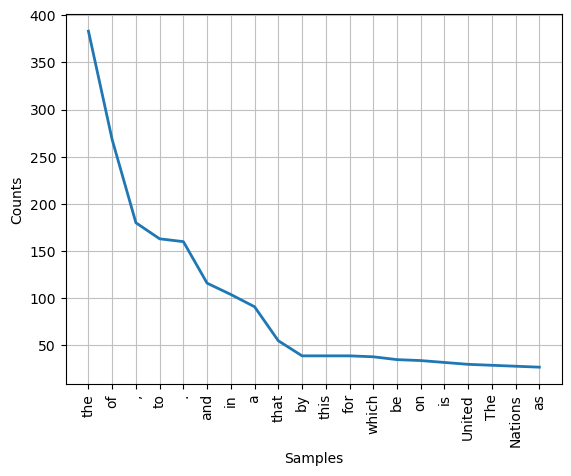

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [44]:
# plot the histogram with the top most used words
freq.plot(20)

Notice that the most frequent words are not that informative about the Austrian speech (the, of, to...). These words are often called *stop-words*. These words are generally filtered out before processing text (natural language). These are actually some of the most common words in any language (articles, prepositions, pronouns, conjunctions, etc) but do not add much information to the text. Let's now use NLTK to filter those words

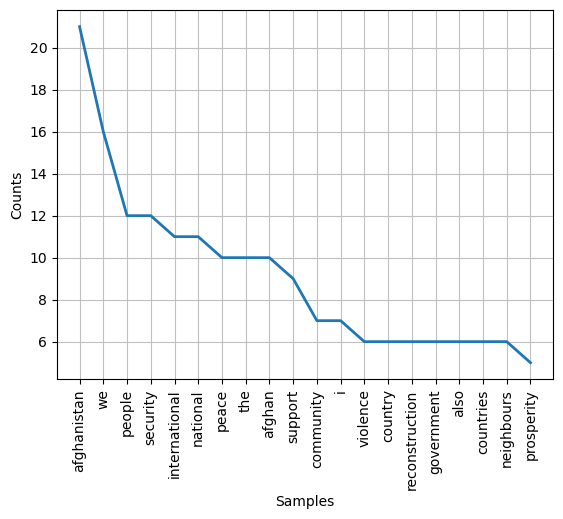

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [47]:
from nltk.corpus import stopwords

def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        if (w not in sw) and (w.isalpha()):
            no_sw.append(w.lower())
    return no_sw

text = df.loc[2002,"AFG"]["Speech"]

words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)

freq.plot(20)

**Q: Can you change the method preprocess to put all words in lower case, remove punctuation and remove non-informative words (e.g., United Nations)?**

Tip: the method isalpha() might be useful

A regular expression is a sequence of characters that specifies a pattern. Usually, such patterns are used by to find, match, replace sub-strings within a document. Regular expressions have a particular syntax and are often useful to clean and pre-process textual data. Here one example where the regular expression 'afg.\*' is used to match any word that starts with afg and is followed by any character.

In [48]:
# Regular expression example
s = set({})
import re
for w in words:
    if re.match('afg.*n$', w):
        s.add(w)
print(s)

{'afghanistan', 'afghan'}


Another useful usage of NLTK is performing sentiment analysis.

Sentiment analysis can be seen as the process of automatically classifying text into positive or negative sentiment categories. With NLTK, you can employ these algorithms without effort. This was also called opinion mining.

In the political field, sentiment analysis is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level or to derive the opinion or attitude of a speaker.

NLTK implements VADER (Valence Aware Dictionary and sEntiment Reasoner), which is a lexicon and rule-based sentiment analysis. VADER uses a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

NLTK implements VADER through the module SentimentIntensityAnalyzer. Below an example of application (with natural limitations as VADER is specifically attuned to sentiments expressed in **social media**):

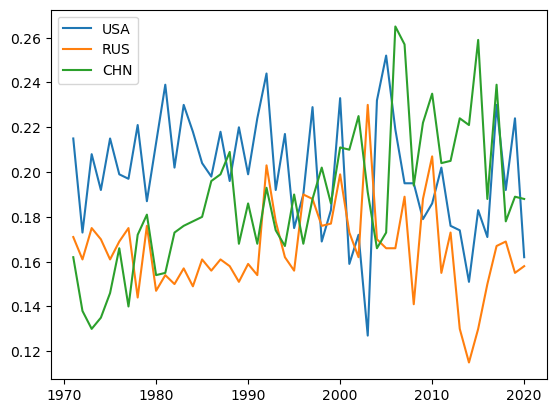

In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

sia = SentimentIntensityAnalyzer()

vecUSA = [sia.polarity_scores(df.loc(axis=0)[i,"USA"]["Speech"])['pos'] for i in np.arange(1971, 2021)]
vecRUS = [sia.polarity_scores(df.loc(axis=0)[i,"RUS"]["Speech"])['pos'] for i in np.arange(1971, 2021)]
vecCHN = [sia.polarity_scores(df.loc(axis=0)[i,"CHN"]["Speech"])['pos'] for i in np.arange(1971, 2021)]

fig, ax = plt.subplots()
ax.plot(np.arange(1971, 2021), vecUSA, label='USA')
ax.plot(np.arange(1971, 2021), vecRUS, label='RUS')
ax.plot(np.arange(1971, 2021), vecCHN, label='CHN')

ax.legend()

plt.show()
